In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# from hurst import compute_Hc

In [2]:
!pip install hurst

In [3]:
 from hurst import compute_Hc

In [5]:
prices = pd.read_csv('final_data_norm.csv', parse_dates=['Timestamp'], index_col='Timestamp')
prices = prices.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'Timestamp' else col)
prices


,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-03-11,-1.416659,-1.420558,-1.426727,-1.426903,-1.424853,-1.421595,-1.414042,-1.403588,-1.393133,-1.382952,-1.372094,-1.360408,-1.351622,-1.343384,-1.333519,-1.325976,-1.319087,-1.313109,-1.309208,-1.306107
2016-03-14,-1.462301,-1.472009,-1.482483,-1.486425,-1.485694,-1.483600,-1.477712,-1.468183,-1.459244,-1.449825,-1.439647,-1.429297,-1.421079,-1.414141,-1.405593,-1.398603,-1.393041,-1.387593,-1.384227,-1.381651
2016-03-15,-1.504228,-1.514607,-1.527892,-1.535233,-1.535472,-1.533584,-1.527089,-1.517461,-1.508316,-1.499284,-1.488712,-1.477881,-1.469107,-1.461563,-1.452365,-1.444678,-1.438367,-1.432122,-1.427919,-1.425299
2016-03-16,-1.419844,-1.426643,-1.440522,-1.448331,-1.447591,-1.444372,-1.437431,-1.428227,-1.419032,-1.410119,-1.399115,-1.387963,-1.378961,-1.370482,-1.361888,-1.354871,-1.348509,-1.342255,-1.338886,-1.336325
2016-03-17,-1.355626,-1.360255,-1.373846,-1.382261,-1.383064,-1.381734,-1.377009,-1.370292,-1.363145,-1.355088,-1.345784,-1.335752,-1.327977,-1.320802,-1.312817,-1.306453,-1.301592,-1.296917,-1.294369,-1.292677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,0.835726,0.779651,0.811547,0.839093,0.864957,0.887792,0.908630,0.926472,0.941884,0.955530,0.966677,0.975294,0.981823,0.989337,0.998928,1.007441,1.015631,1.022611,1.028738,1.034918
2023-12-01,0.626091,0.664025,0.698311,0.730168,0.758640,0.782129,0.802080,0.818593,0.833516,0.846164,0.856458,0.865071,0.871727,0.881696,0.890817,0.898892,0.907484,0.914124,0.920744,0.929995
2023-12-04,0.580980,0.625299,0.666123,0.703383,0.737745,0.766944,0.791685,0.813265,0.831472,0.846861,0.859302,0.869422,0.879116,0.890729,0.900785,0.910606,0.919412,0.927077,0.934759,0.945104


In [6]:
cumret = np.log(prices).diff().cumsum()+1 # calculate cumulative returns
cumret.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [7]:
def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]

    return s1,s2

def cadf_pvalue(s1, s2, cumret):
    '''
    perform CADF cointegration tests
    since it is sensitive to the order of stocks in the pair, perform both tests (s1-2 and s2-s1)
    return the smallest p-value of two tests
    '''
    from statsmodels.tsa.stattools import coint

    p1 = coint(cumret[s1], cumret[s2])[1]
    p2 = coint(cumret[s2], cumret[s1])[1]

    return min(p1,p2)

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant

    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]

    return halflife

def calculate_metrics(pairs, cumret, pairs_df):
    '''
    calculate metrics for pairs using data in cumret
    return dataframe of results
    '''
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller

    cols = ['Euclidean distance', 'CADF p-value', 'ADF p-value', 'Spread SD', 'Pearson r',
        'Num zero-crossings', 'Hurst Exponent', 'Half-life of mean reversion', '% days within historical 2-SD band']
    results = pd.DataFrame(index=pairs, columns=cols)

    for pair in pairs:
        s1,s2 = parse_pair(pair)
        spread = cumret[s1] - cumret[s2]
        results.loc[pair]['Euclidean distance'] = np.sqrt(np.sum((spread)**2))
        results.loc[pair]['CADF p-value'] = cadf_pvalue(s1, s2, cumret)
        results.loc[pair]['ADF p-value'] = adfuller(spread)[1]
        hist_sd = pairs_df.loc[pair]['Spread SD'] # historical standard deviation
        results.loc[pair]['Spread SD'] = hist_sd
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0][1]
        results.loc[pair]['Num zero-crossings'] = ((spread[1:].values * spread[:-1].values) < 0).sum()
        results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]
        results.loc[pair]['Half-life of mean reversion'] = calculate_halflife(spread)
        results.loc[pair]['% days within historical 2-SD band'] = (abs(spread) < 2*hist_sd).sum() / len(spread) * 100

    return results

def plot_pairs(pairs, cumret_train, cumret_test):
    '''
    plot cumulative returns of the spread for each pair in pairs
    '''

    for pair in pairs:
        s1,s2 = parse_pair(pair)
        spread_train = cumret_train[s1] - cumret_train[s2]
        spread_test = cumret_test[s1] - cumret_test[s2]
        spread_mean = spread_train.mean() # historical mean
        spread_std = spread_train.std() # historical standard deviation

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))
        fig.suptitle(f'Spread of {pair} pair', fontsize=16)
        ax1.plot(spread_train, label='spread')
        ax1.set_title('Formation period')
        ax1.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax1.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax1.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax1.legend()
        ax2.plot(spread_test, label='spread')
        ax2.set_title('Trading period')
        ax2.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax2.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax2.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax2.legend()

In [8]:
def select_pairs(train):
    '''
    select pairs using data from train dataframe
    return dataframe of selected pairs
    '''
    tested = []

    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller

    cols = ['Euclidean distance', 'Num zero-crossings', 'Pearson r',
            'Spread SD', 'Hurst Exponent', 'Half-life of mean reversion']
    pairs = pd.DataFrame(columns=cols)

    for s1 in train.columns:
        for s2 in train.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested) and (f'{s2}-{s1}' not in tested):
                tested.append(f'{s1}-{s2}')
                cadf_p = cadf_pvalue(s1,s2,train)
                if cadf_p<0.01:
                    spread = train[s1] - train[s2]
                    hurst = compute_Hc(spread)[0]
                    if hurst<0.5:
                        halflife = calculate_halflife(spread)
                        if halflife>1 and halflife<30:
                            num_crossings = (spread.values[1:] * spread.values[:-1] < 0).sum()
                            if num_crossings>len(train.index)/252*12:
                                distance = np.sqrt(np.sum((train[s1] - train[s2])**2)) # Euclidean distance
                                pearson_r = np.corrcoef(train[s1], train[s2])[0][1]
                                spread_sd = spread.std()
                                pairs.loc[f'{s1}-{s2}'] = [distance, num_crossings, pearson_r,
                                                           spread_sd, hurst, halflife]

    return pairs


In [24]:
cumret12_6 = cumret.loc['2017-11-30':]
cumret12_6 = cumret12_6 / cumret12_6.iloc[0] # divide by first row so that all prices start at 1
train12_6 = cumret12_6.loc['2017-12-12':'2018-09-12'] # formation period
test12_6 = cumret12_6.loc['2018-11-05':'2023-12-06'] # trading period
test12_6

,Instr1,Instr2,Instr3,Instr4,Instr5,Instr6,Instr7,Instr8,Instr9,Instr10,Instr11,Instr12,Instr13,Instr14,Instr15,Instr16,Instr17,Instr18,Instr19,Instr20
Timestamp,,,,,,,,,,,,,,,,,,,,
2018-11-05,1.652970,1.509937,1.541501,1.678633,2.605779,1.766055,0.462360,1.788969,1.894989,1.940492,2.399431,1.552674,1.515619,1.218887,1.173884,2.311391,1.849535,1.671546,2.419133,3.643756
2018-11-06,1.578500,1.453126,1.493814,1.637538,2.571099,1.738855,0.443550,1.767246,1.854030,1.904048,2.366736,1.524311,1.493403,1.202026,1.158587,2.288045,1.831467,1.660747,2.410467,3.615865
2018-11-07,1.573746,1.451154,1.493232,1.640198,2.576839,1.746510,0.450880,1.777824,1.877646,1.928650,2.392958,1.551057,1.518885,1.225456,1.184034,2.334288,1.875284,1.694248,2.444323,3.764306
2018-11-08,1.440550,1.359036,1.419911,1.579242,2.525975,1.706804,0.423494,1.746225,1.816400,1.872467,2.339585,1.502468,1.477114,1.191101,1.150841,2.280685,1.829733,1.662776,2.415398,3.648340
2018-11-09,1.384391,1.312467,1.381567,1.545670,2.496728,1.682797,0.405614,1.724145,1.770735,1.827086,2.294838,1.459779,1.439895,1.159587,1.120434,2.230343,1.785874,1.632155,2.386523,3.529595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,5.070197,5.975997,4.035194,1.518922,2.210625,1.671535,1.799619,3.189029,4.798731,5.752319,7.336536,6.867264,5.098403,5.728121,3.754523,9.146950,5.950435,2.272699,2.678873,6.540447
2023-11-30,5.063440,5.928637,3.990552,1.475312,2.169157,1.634699,1.772138,3.155363,4.731362,5.688764,7.276430,6.812170,5.050345,5.688289,3.716036,9.083841,5.896286,2.234702,2.643564,6.397127
2023-12-01,4.948649,5.871880,3.939914,1.429817,2.128416,1.600153,1.746613,3.124188,4.669571,5.630643,7.221083,6.761669,5.006717,5.653091,3.681794,9.027584,5.848031,2.200767,2.612208,6.273737


In [25]:
pairs12_6 = select_pairs(train12_6)
pairs12_6

,Euclidean distance,Num zero-crossings,Pearson r,Spread SD,Hurst Exponent,Half-life of mean reversion
Instr3-Instr18,1.163216,10.0,0.817292,0.109413,0.477451,8.924776
Instr6-Instr10,1.736810,6.0,0.955923,0.086467,0.483342,8.696023
Instr6-Instr17,1.546876,12.0,0.837019,0.143506,0.381791,6.848430
Instr8-Instr9,1.406761,6.0,0.953900,0.085119,0.409336,6.308453
Instr8-Instr10,1.674952,6.0,0.959893,0.084845,0.451412,7.522013


In [26]:
pairs12_6.sort_values(by='Euclidean distance')

,Euclidean distance,Num zero-crossings,Pearson r,Spread SD,Hurst Exponent,Half-life of mean reversion
Instr3-Instr18,1.163216,10.0,0.817292,0.109413,0.477451,8.924776
Instr8-Instr9,1.406761,6.0,0.953900,0.085119,0.409336,6.308453
Instr6-Instr17,1.546876,12.0,0.837019,0.143506,0.381791,6.848430
Instr8-Instr10,1.674952,6.0,0.959893,0.084845,0.451412,7.522013
Instr6-Instr10,1.736810,6.0,0.955923,0.086467,0.483342,8.696023


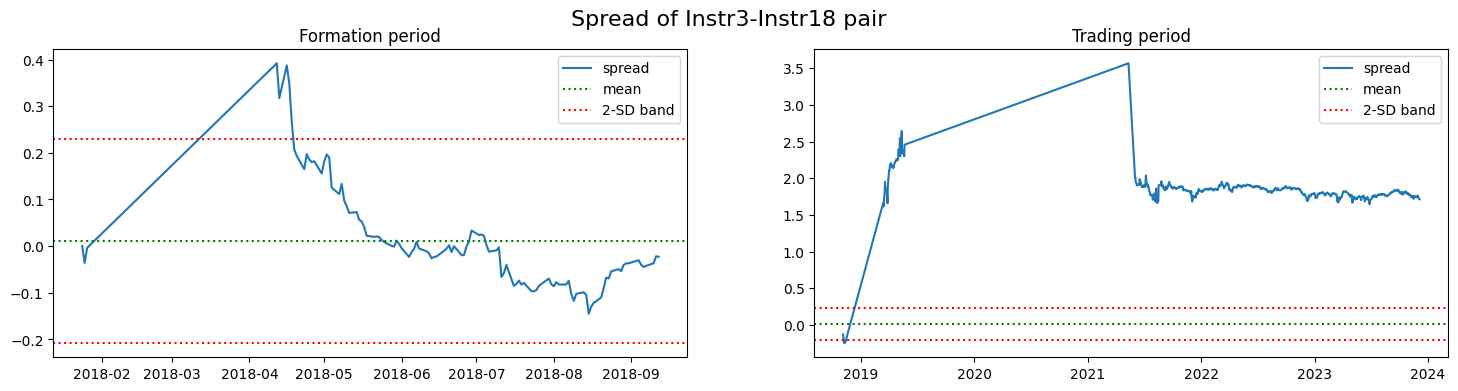

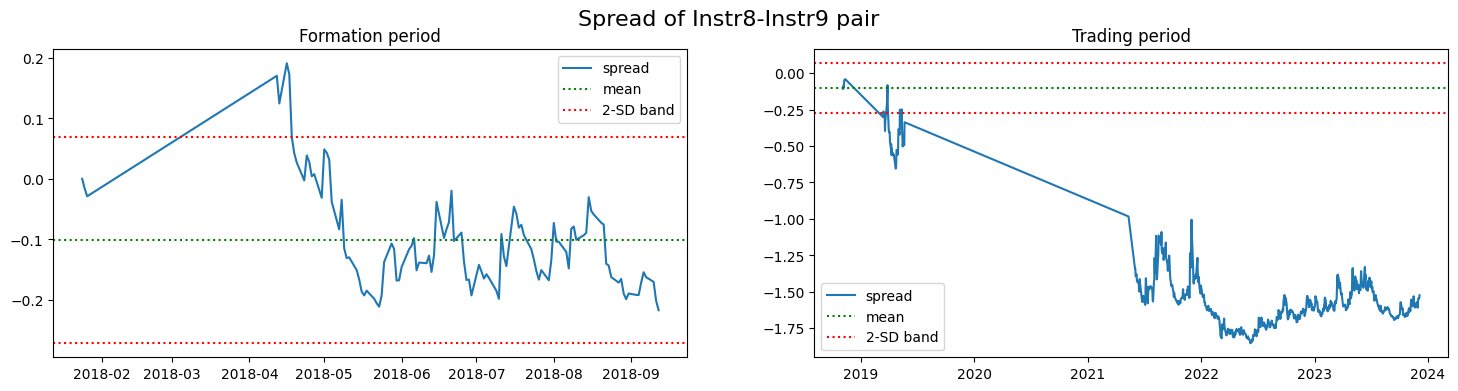

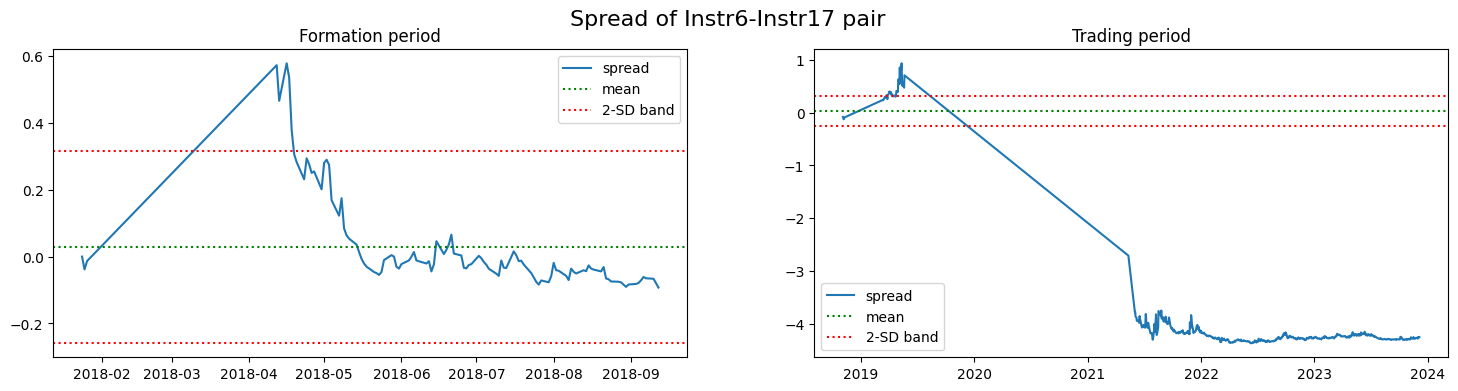

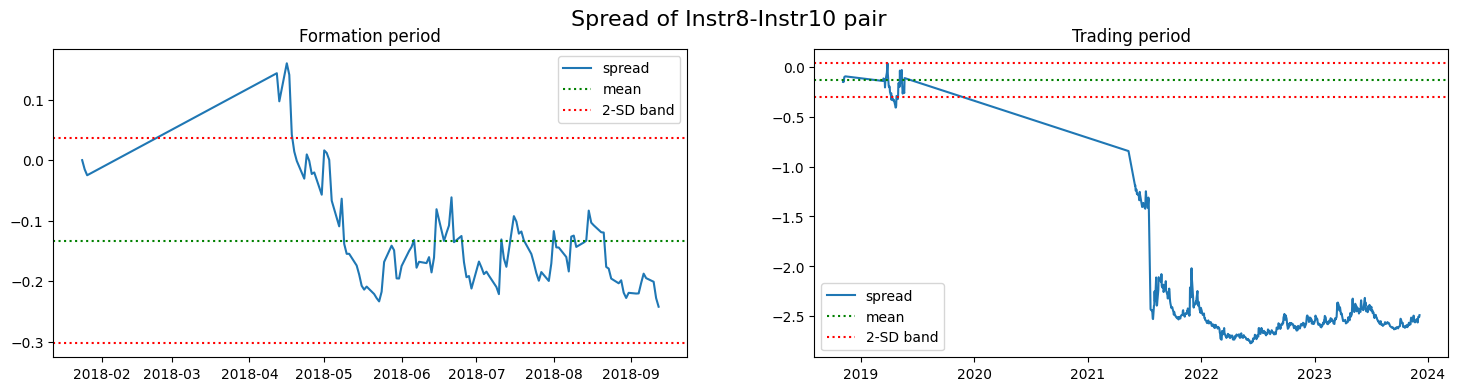

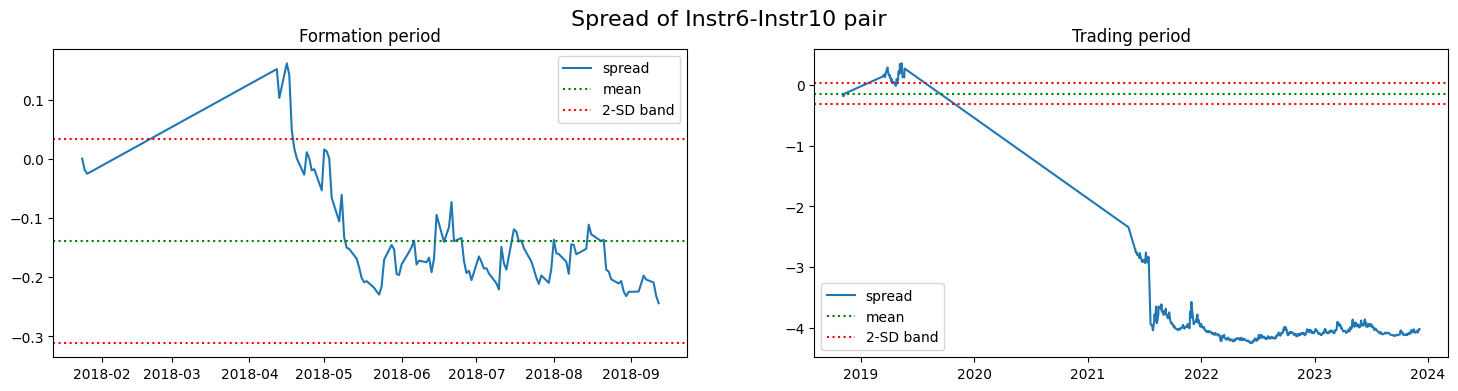

In [27]:
top5_distance = list(pairs12_6.sort_values(by='Euclidean distance').index[:5])
plot_pairs(top5_distance, train12_6, test12_6)
